# Домашняя работа №1. Зеленский Александр

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

В речи прокурора идет игра слов, а не правильные математические рассуждения, первую часть предложения можно записать так:
P(группа крови = X|невиновен) = 0.01
P(группа крови = X|невиновен) + P(группа крови =! X|невиновен) = 1

Вывод прокурора неверен, с вероятностью 0.99 у подсудимого была бы не такая группа как обнаружили на месте преступления.
Должен был оценить P(виновен|группа крови = X).

2. Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

В оценку 10000 человек входит большая группа людей, которые не могли быть преступниками (младенцы, дети, бабушки, инвалиды и тп), плюс ко всему, раз уж он стал подсудимым, он не случайно выбран из этого объема, то есть вероятность что он совершил убийство > 0.0001. Адвокат оценил условную вероятность слуйчайного выбора человека из всего населения с выбранной группой крови. Должен был учесть много других факторов, некоторые из которых описаны выше (более жесткие ограничения на выборку(ни бабушки, ни младенцы), показания свидетелей, где был во время убийства, факты криминалистического расследования)

3.Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


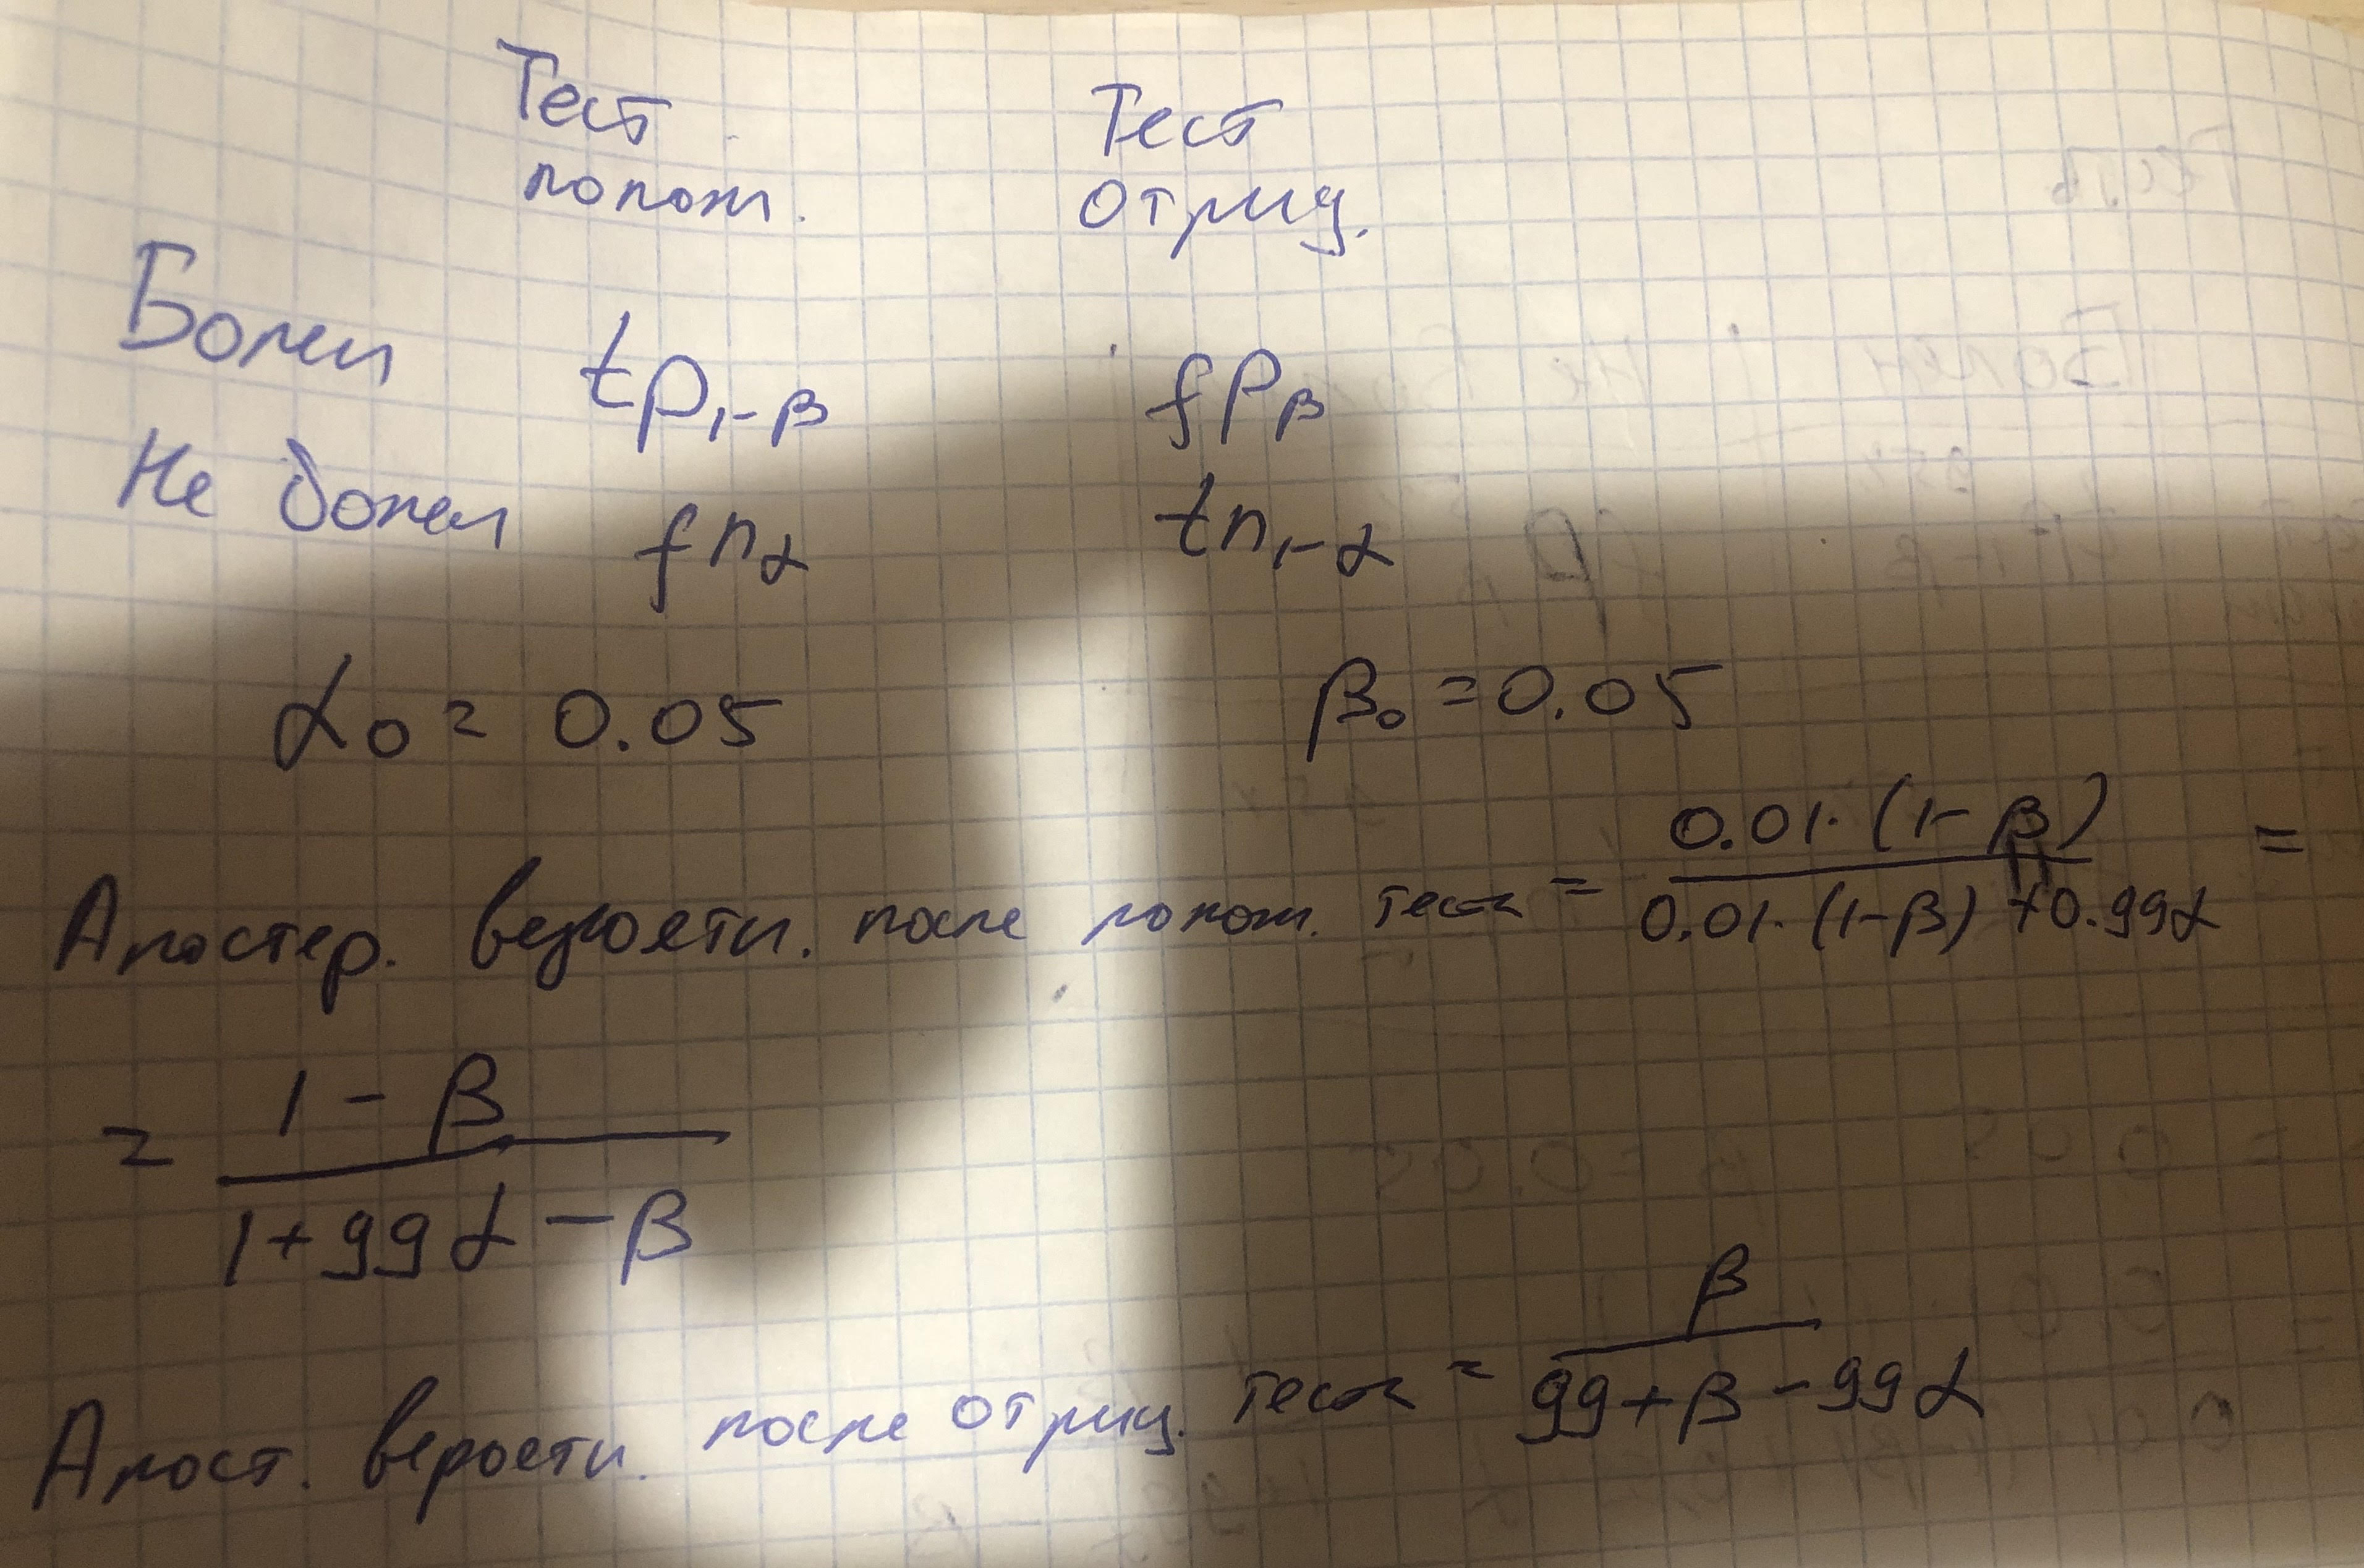

In [25]:
from IPython.display import Image
Image("1.jpg")

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

In [16]:
def true_test(alpha, beta):
    return 100*(1-beta) / (1+99*alpha-beta)
def false_test(alpha, beta):
    return 100*beta / (99-99*alpha+beta)

In [17]:
alpha_0 = np.arange(0.01, 0.05, 0.001)
rez_pt_fp = []
rez_pt_fn = []
rez_nt_fp = []
rez_nt_fn = []
for i in alpha_0:
    p_fp_i = true_test(i, 0.05)
    p_fn_i = true_test(0.05, i) 
    p_2fp_i = false_test(i, 0.05)
    p_2fn_i = false_test(0.05, i) 
    rez_pt_fp.append(p_fp_i)
    rez_pt_fn.append(p_fn_i)
    rez_nt_fp.append(p_2fp_i)
    rez_nt_fn.append(p_2fn_i)
x = 100*alpha_0

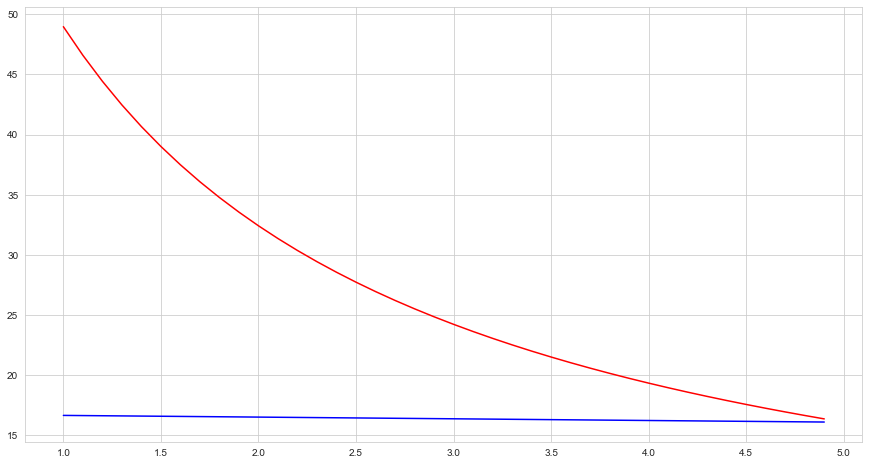

In [23]:
fig = plt.figure(figsize=figsize)
plt.plot(x, rez_pt_fp, c='r')
plt.plot(x, rez_pt_fn, c='b')

Из данного графика видно что при положительном тесте эффект значительный при борьбе с fp (когда тест выдает позитивный результат у здорового человека), к примеру при alpha0=fp0=5% <-> p=16%, а при alpha1=fp1=1% <-> p=48%.

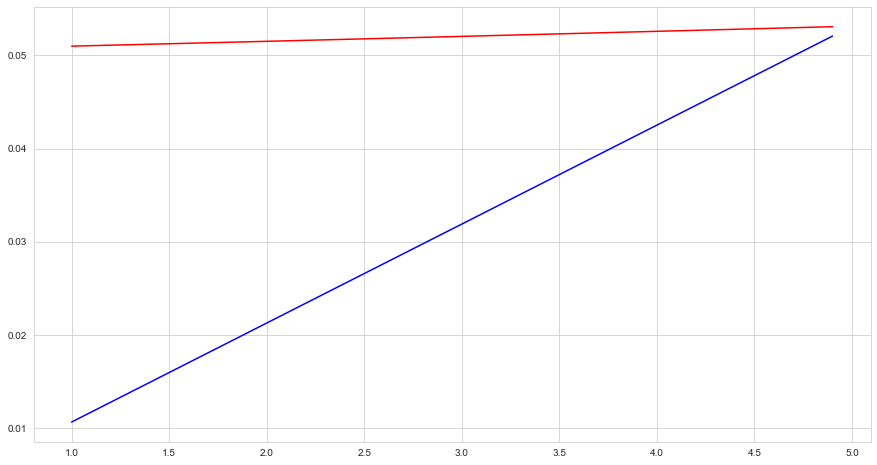

In [24]:
fig = plt.figure(figsize=figsize)
plt.plot(x, rez_nt_fp, c='r')
plt.plot(x, rez_nt_fn, c='b')

Из данного графика видно что при отрицательном тесте эффект значительнее при борьбе с fn (отрицательный результат у больного) - при beta=5% <-> p=0.05%, при beta=1% <-> p=0.01%.

Так как вероятность тогоа что человек болен после отрицательного теста очень мала, эффект не настолько значителен (мало ощутим).

Рекомендация - сокращать ошибку типа false positives.